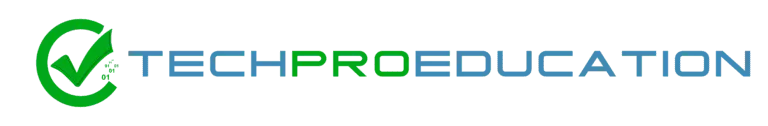

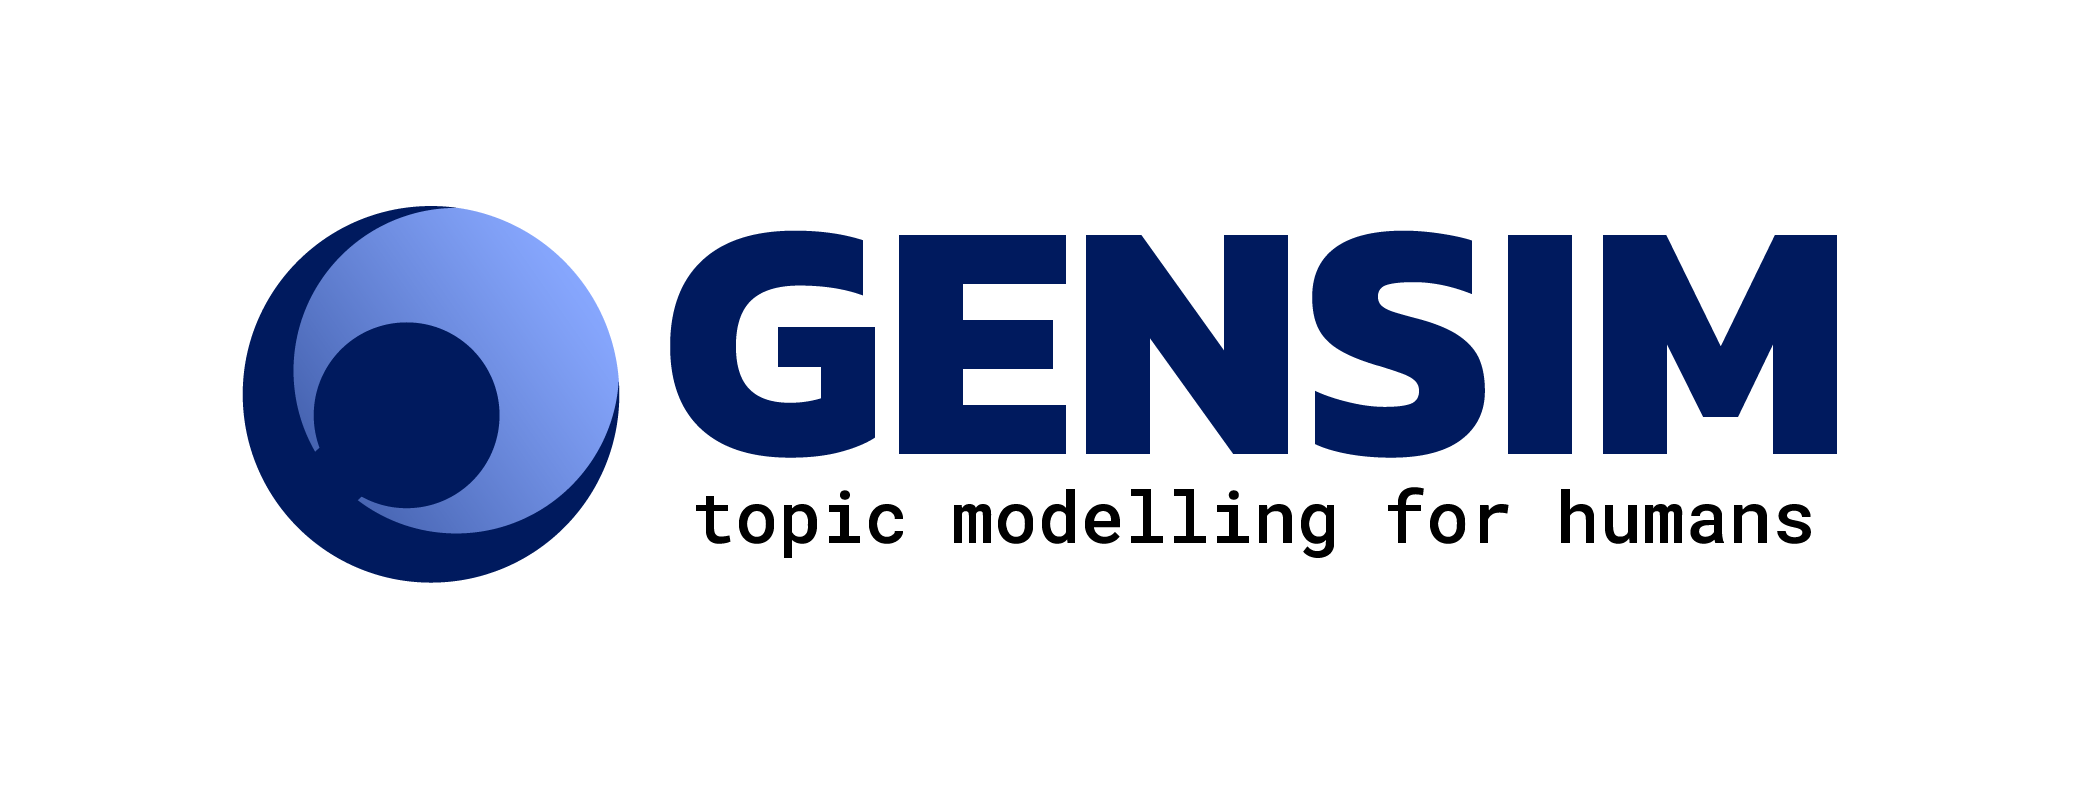

## Word_embedding

## Word2Vec

In [26]:
pip install gensim

In [27]:
import numpy as np
from gensim.models import Word2Vec

Gazetelerden alinmis 400 bin satirdan olusan, cleaning islemi tamamlanmis bir datasetimiz var.

Text' i cumlelerden olusan bir liste haline getirmek icin text' i __split__ ile böldük. for dongusu ile ise cumleleri kelimelerine ayirdik ve corpus degiskenine atadik :

In [28]:
text = open('newspaper.txt', 'r', encoding='utf8')       # utf8' mutlaka yaz.  # r=read
text = text.read()
list_sent = text.split('\n')

corpus = []

for sent in list_sent:
    corpus.append(sent.split())                          # split, her bosluktan itibaren ayirma islemi yapar. 

Ilk 1017 karaktere bakarsak, her cumle satirla ayrilmis (\n) :

In [35]:
text[:1017]     

'iran devlet televizyonu ülkedeki eyaletin sinde yapılan reformcuları protesto amaçlı yürüyüşlere milyonlarca kişinin katıldığını bildirdi \ngösterilerde fitnecilere ölüm münafıklara ölüm abd ye ölüm ingiltere ye ölüm sloganları atıldı \ndini lider ali hamaney ve cumhurbaşkanı mahmud ahmedinejad ı destekleyen iranlılar son olaylarda yeğeni öldürülen mir hüseyin musevi başta olmak üzere muhalefet liderlerini kınadılar \nmusevi ye ölüm ve idam idam sloganları duyuldu \nmuhalefet liderleri kaçtı mı aşure günü yaşanan çatışmalarda devlet kaynaklarına göre u terörist olmak üzere kişi ölmüştü \nden fazla kişinin yaralandığı olaylar sırasında en az kişi tutuklanmıştı \nöte yandan iran haber ajansı irna muhalif liderler mir hüseyin musevi ve mehdi kerrubi nin başkentten kaçarak ülkenin kuzeyine geçtiğini ileri sürdü ancak muhalefet iddiayı yalanladı \nhamaney in bir dönem korumalığını yapan ve şu anda fransa da saklandığı söylenen bir kişinin muhalefete verdiği bilgilere göre münzevi yaşamı na

Bolme isleminden sonra artik cumlelerden olusan bir listemiz var :

In [36]:
list_sent[:17]

['iran devlet televizyonu ülkedeki eyaletin sinde yapılan reformcuları protesto amaçlı yürüyüşlere milyonlarca kişinin katıldığını bildirdi ',
 'gösterilerde fitnecilere ölüm münafıklara ölüm abd ye ölüm ingiltere ye ölüm sloganları atıldı ',
 'dini lider ali hamaney ve cumhurbaşkanı mahmud ahmedinejad ı destekleyen iranlılar son olaylarda yeğeni öldürülen mir hüseyin musevi başta olmak üzere muhalefet liderlerini kınadılar ',
 'musevi ye ölüm ve idam idam sloganları duyuldu ',
 'muhalefet liderleri kaçtı mı aşure günü yaşanan çatışmalarda devlet kaynaklarına göre u terörist olmak üzere kişi ölmüştü ',
 'den fazla kişinin yaralandığı olaylar sırasında en az kişi tutuklanmıştı ',
 'öte yandan iran haber ajansı irna muhalif liderler mir hüseyin musevi ve mehdi kerrubi nin başkentten kaçarak ülkenin kuzeyine geçtiğini ileri sürdü ancak muhalefet iddiayı yalanladı ',
 'hamaney in bir dönem korumalığını yapan ve şu anda fransa da saklandığı söylenen bir kişinin muhalefete verdiği bilgilere 

In [38]:
list_sent[17].split()

['işte',
 'abd',
 'yi',
 'korkutan',
 'minibüs',
 'araç',
 'kimlik',
 'numarası',
 'okunmayan',
 'gösterge',
 'paneli',
 'üzerinde',
 'sahte',
 'olduğu',
 'belirlenen',
 'üzerinde',
 '˜görevli',
 'polis',
 'aracı',
 '™',
 'yazısı',
 'bulunan',
 'camları',
 'tente',
 'ile',
 'kapatılmış',
 'minibüs',
 'new',
 'york',
 'polisinin',
 'alarma',
 'geçmesine',
 'neden',
 'oldu']

Corpus icindeki her bir cumle liste icinde tokenlerine ayrilmis sekilde :

In [39]:
print(corpus[:10])

[['iran', 'devlet', 'televizyonu', 'ülkedeki', 'eyaletin', 'sinde', 'yapılan', 'reformcuları', 'protesto', 'amaçlı', 'yürüyüşlere', 'milyonlarca', 'kişinin', 'katıldığını', 'bildirdi'], ['gösterilerde', 'fitnecilere', 'ölüm', 'münafıklara', 'ölüm', 'abd', 'ye', 'ölüm', 'ingiltere', 'ye', 'ölüm', 'sloganları', 'atıldı'], ['dini', 'lider', 'ali', 'hamaney', 've', 'cumhurbaşkanı', 'mahmud', 'ahmedinejad', 'ı', 'destekleyen', 'iranlılar', 'son', 'olaylarda', 'yeğeni', 'öldürülen', 'mir', 'hüseyin', 'musevi', 'başta', 'olmak', 'üzere', 'muhalefet', 'liderlerini', 'kınadılar'], ['musevi', 'ye', 'ölüm', 've', 'idam', 'idam', 'sloganları', 'duyuldu'], ['muhalefet', 'liderleri', 'kaçtı', 'mı', 'aşure', 'günü', 'yaşanan', 'çatışmalarda', 'devlet', 'kaynaklarına', 'göre', 'u', 'terörist', 'olmak', 'üzere', 'kişi', 'ölmüştü'], ['den', 'fazla', 'kişinin', 'yaralandığı', 'olaylar', 'sırasında', 'en', 'az', 'kişi', 'tutuklanmıştı'], ['öte', 'yandan', 'iran', 'haber', 'ajansı', 'irna', 'muhalif', 'lid

In [41]:
model = Word2Vec(corpus, vector_size= 100, window=5, min_count=5, sg=1)

vector_size -->__ Word Embedding boyutu (Feature sayisi). (Best practise olarak 50, 100, 300 sayilari tercih edilir.)

__window (window_size) -->__ Ilgili tokenin saginda ve solunda kacar kelimeye bakarak anlamsal iliskiyi yakalamaya calissin?

__min_count=5 -->__ Corpus' ta 5 ve daha az sayida gecen tokenleri egitime dahil etme.

__sg (Skip-gram) -->__ sg=0 olursa CBOW, sg=1 olursa Skip-gram demek. (Default=0)

Buyuk corpuslarda CBOW , kucuk corpuslarda ise Skip-Gram daha iyi sonuclar verir. Datasetimiz kucuk oldugu icin Skip-Gram' i tercih ettik. 

Yukarida modelimizi kurduk. model Word2Vec (model.wv) icine hangi tokene ait Word2Vec' i gormek istiyorsak onu veriyoruz. 100 boyutlu Word Embedding olusmus (Butun degerler -1 ile 1 arasinda) :

In [42]:
model.wv['aksaray']

array([-0.0702002 ,  0.20226257,  0.10917024,  0.19807167,  0.28377336,
       -0.25715664,  0.02237361,  0.20206176, -0.01956175, -0.01371842,
       -0.44722116, -0.27309227,  0.0502453 ,  0.12822053, -0.04937271,
       -0.06408817, -0.0719963 , -0.28502247,  0.16390778, -0.5207773 ,
       -0.20037799,  0.12544514,  0.36407986, -0.22551066, -0.08515817,
        0.17763151, -0.06366334,  0.09085228, -0.03305805,  0.07550216,
       -0.04060565, -0.1671933 , -0.08222225, -0.06662488,  0.04601883,
        0.35892227, -0.01558053, -0.27181336,  0.3272632 , -0.43841177,
        0.2808323 ,  0.17746319,  0.19366035, -0.28613535,  0.04402488,
        0.15738605, -0.38529018,  0.05666393,  0.02786737,  0.08815049,
        0.17314415,  0.24684848,  0.26116374,  0.08653766, -0.47012943,
        0.14358886,  0.14853524, -0.04412102, -0.62204915, -0.11499784,
       -0.06137878,  0.3223917 , -0.27012894,  0.1870444 , -0.03176419,
       -0.18371825, -0.0590893 ,  0.17276122,  0.07192402,  0.30

__model.wv.most_similar -->__ Ilgili token ile en cok benzesen 10 kelime geldi. Icindeki __topn=10__ parametresini degistirerek daha farkli sayida token secebiliriz.

sey kelimesinin yerine kullanilabilecek kelimeler ve sey kelimesi ile birlikte en cok kullanilan 'haberim', 'bilgimiz', 'sorunum' kelimeleri sey kelimesine en yakin kelimeleri olarak secilmis :

In [45]:
model.wv.most_similar('gül')

[('hayrünnisa', 0.7586564421653748),
 ('abdullah', 0.7267320156097412),
 ('erdoğan', 0.7256457805633545),
 ('cumhurbaşkanı', 0.6843487620353699),
 ('ader', 0.6831808090209961),
 ('emine', 0.678978443145752),
 ('recep', 0.6702086329460144),
 ('çankaya', 0.6618112325668335),
 ('nişani', 0.6601482629776001),
 ('forumun', 0.6590414643287659)]

Burada oldugu gibi corpus kucuk oldugu zaman önceki ve sonraki kelimeler ile anlam bütünlükleri kurulur. Buyuk corpuslarda daha fazla anlam butunlukleri kurularak daha yakin anlamli kelimeler tahmin edilebilir. 

In [46]:
model.wv.most_similar('kırmızı')

[('çizgileri', 0.6457471251487732),
 ('sarı', 0.613370418548584),
 ('siyah', 0.6075897216796875),
 ('halı', 0.6010838747024536),
 ('ışıkta', 0.5984593629837036),
 ('renkli', 0.5899823904037476),
 ('bültenle', 0.5869702100753784),
 ('gömlekliler', 0.5805174112319946),
 ('gömlekli', 0.5801270604133606),
 ('halıda', 0.577353835105896)]

In [47]:
model.wv.most_similar('okul')

[('kreş', 0.686011016368866),
 ('üniversite', 0.6746110916137695),
 ('okulun', 0.6735133528709412),
 ('mescit', 0.6489521265029907),
 ('hastane', 0.6445554494857788),
 ('mezarlık', 0.6374632716178894),
 ('yatılı', 0.6282282471656799),
 ('ilkokul', 0.6254924535751343),
 ('ilköğretim', 0.6136960387229919),
 ('cemaatini', 0.6089395880699158)]

In [48]:
model.wv.most_similar('kitap')

[('kitabı', 0.7460963129997253),
 ('şiir', 0.7205340266227722),
 ('film', 0.7131659388542175),
 ('resim', 0.7031506896018982),
 ('belgesel', 0.6954229474067688),
 ('kitabın', 0.6831009984016418),
 ('yazması', 0.6755259037017822),
 ('müziğini', 0.6744871735572815),
 ('hayatıyla', 0.6647027134895325),
 ('şöhret', 0.6628238558769226)]

Bir Word Embedding modelinin ne kadar iyi egitildigini anlayabilmek icin __most_similar__ fonksiyonu kullanilir. Iki farkli tokenden bir feature ozelligi cikarilarak ve yeni bir feature ekleyerek kelimenin anlaminin degisip degismedigi gozlemlenir. 

Cumleye ögrenme ve doktor tokenlerini verip tedavi tokenini cikardik. Doktordan tedavi cikarilip ogrenme eklenirse ogretmen gibi bir kelimenin bulunmasi beklenir fakat cok alakasiz bir token ile benzerlik bulunmus :

In [49]:
model.wv.most_similar(positive=['öğrenme', 'doktor'], negative=['tedavi'], topn=1)

[('psikoloji', 0.6543664336204529)]

Rusya' dan Moskova cikarildiginda ulke kalir, ulkeye Ankara ilave edildiginde 'Turkiye' bulunur. Model bunu yakalayabilmis. Gazete haberlerinde ulke isimleri cok fazla gectigi icin modelin bunu yakalayabilmesi beklenen bir sonuc :

In [50]:
model.wv.most_similar(positive=['ankara', 'rusya'], negative=['moskova'], topn=1)

[('türkiye', 0.7445991039276123)]

Olusturdugumuz modeli kaydettik :

In [51]:
model.save("word2vec.model")

Modeli geri cagirmak icin :

In [52]:
model = Word2Vec.load("word2vec.model")

## Glove

In [56]:
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors     

Glove modelin direk olarak kullanamiyoruz. Bu yuzden Glove modellerini Word2Vec formatina donusturup o sekilde kullanacagiz.

__KeyedVectors -->__ Glove modeli, Word2Vec formatina donusturup kendi lokalimize kaydettikten sonra lokalden geri cagirmak icin kullandigimiz fonksiyondur. 

Kullanacagimiz corpus, 2014 yilinda wikipedia uzerindeki 6 milyar token ile egitilmis (6B) ve her bir token 100 vektor boyutunda (100d). Egitilmis glove modelimizi internet uzerinden __glove.6B.100d.txt__ ismiyle install ettik ve glove_modeli lokalimize kaydetmek icin bir degiskene istedigimiz isimle atadik. 

In [57]:
glove_model = 'glove.6B.100d.txt'

__glove2word2vec -->__ Glove' dan word2vec' e donusturur ve lokale kaydeder. 

Daha sonra glove modeli __glove2word2vec__  ile word2vec formatina donusturduk. __glove2word2vec__ icine glove_modeli ve lokale kaydettigimiz, donusmesini istedigimiz modelin ismini verdik (glove modeli word2vec'e donusturerek kaydet). Modelimizde 400000 adet kelimeye ait 100 boyutlu vektorler var.

Model daha onceden egitildigi icin her tokene ait Word Embedding' ler sabit. 

In [58]:
word2vec = 'glove.6B.100d.glove'
glove2word2vec(glove_model, word2vec)

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_14424/2553352563.py:2: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_model, word2vec)


(400000, 100)

__KeyedVectors__ fonksiyonu ile lokale kaydettigimiz Word2Vec formatindaki modeli cagirdik :

In [59]:
model2 = KeyedVectors.load_word2vec_format(word2vec)

Model daha onceden egitildigi icin alinan sonuclar her zaman aynidir :

In [60]:
model2['izmir']

array([ 0.0021052, -0.1504   ,  0.44277  , -0.77653  ,  0.049685 ,
        0.36162  , -0.64556  ,  0.031965 ,  0.32785  ,  1.0492   ,
       -0.40957  , -0.43448  ,  0.86788  ,  0.13176  , -0.33421  ,
        0.078688 , -0.44023  , -0.78494  , -0.80508  , -0.053829 ,
        0.21349  , -0.1304   ,  0.55552  ,  0.80507  , -0.54116  ,
        0.14223  , -0.086403 ,  0.049789 ,  0.16237  ,  0.51762  ,
       -0.86124  , -0.35288  ,  0.42465  ,  0.29504  , -0.058929 ,
       -0.042059 , -0.28304  ,  0.68163  , -0.38128  , -0.92071  ,
        0.15022  , -0.48653  , -0.032471 , -1.0217   , -0.2536   ,
        0.32984  ,  0.87331  , -0.25659  ,  0.41713  ,  0.70187  ,
        0.26844  , -0.073702 ,  0.44943  ,  0.37148  , -1.1613   ,
        0.18607  ,  0.22148  , -0.30284  , -0.30314  ,  0.14694  ,
       -0.33141  ,  0.65478  , -0.047409 ,  0.73868  , -0.88869  ,
       -0.10738  , -1.3663   , -0.40605  , -0.84452  ,  0.079424 ,
       -0.57159  , -0.54494  ,  0.88383  ,  0.89814  , -0.6542

Daha fazla kelime ile egitildigi icin bu modeldeki tahminler Word2Vec modele gore daha iyi :

In [61]:
model2.most_similar('ankara')

[('turkey', 0.7512096762657166),
 ('istanbul', 0.6787630915641785),
 ('turkish', 0.6690374612808228),
 ('damascus', 0.6372509002685547),
 ('tbilisi', 0.6322181820869446),
 ('erdogan', 0.6258037090301514),
 ('moscow', 0.6217040419578552),
 ('brussels', 0.6181437969207764),
 ('skopje', 0.6164302229881287),
 ('cyprus', 0.606403112411499)]

teacher ile sozluksel olarak en fazla iliski instructur arasindadir fakat model kurulurken sozluksel anlama gore degil, kelimelerin birlikte kullanilma sikligina gore kurulur. 

In [62]:
model2.most_similar('teacher')

[('student', 0.8083399534225464),
 ('school', 0.75455641746521),
 ('teaching', 0.7521439790725708),
 ('taught', 0.741184651851654),
 ('teachers', 0.7291542887687683),
 ('graduate', 0.7134960293769836),
 ('instructor', 0.7077120542526245),
 ('students', 0.6828974485397339),
 ('teaches', 0.6552315354347229),
 ('education', 0.6528989672660828)]

BERT modeldeki sonuclar Word2Vec' e gore cok daha iyi. Cunku 2018' de cikan BERT model, 2018' deki wikipedia ve Toronta' da buluna bir kutuphanedeki 100 milyon kitap ile egitildi. Bu yuzden skorlari cok daha yuksek :

In [63]:
model2.most_similar('doctor')

[('physician', 0.7673240303993225),
 ('nurse', 0.75215083360672),
 ('dr.', 0.7175194025039673),
 ('doctors', 0.7080884575843811),
 ('patient', 0.7074184417724609),
 ('medical', 0.6995992660522461),
 ('surgeon', 0.6905338764190674),
 ('hospital', 0.6900930404663086),
 ('psychiatrist', 0.658909797668457),
 ('dentist', 0.6447421312332153)]

BERT model ile doctor kelimesinin skorlari :

Word Embedding modelinin ne kadar iyi oldugunu anlamak icin pozitif ve negatif tokenler verip bunlar uzerinden anlamsal iliskileri yakalayip yakalamadigina bakabiliyorduk.

brother - man = sibling, sibling + woman = daughter

In [64]:
model2.most_similar(positive=['woman', 'brother'], negative=['man'], topn=1)

[('daughter', 0.8917792439460754)]

father - man = parent, parent + woman = mother

In [65]:
model2.most_similar(positive=['woman', 'father'], negative=['man'], topn=1)

[('mother', 0.9024618864059448)]

In [66]:
model2.most_similar(positive=['woman', 'uncle'], negative=['man'], topn=1)

[('aunt', 0.8368030190467834)]

In [67]:
model2.most_similar(positive=['ankara', 'germany'], negative=['berlin'], topn=1)

[('turkey', 0.81471186876297)]

In [68]:
model2.most_similar(positive=['teach', 'doctor'], negative=['treat'], topn=1)

[('teacher', 0.7610154151916504)]

In [69]:
model2.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)

[('queen', 0.7698541283607483)]

In [70]:
model2.most_similar(positive=['love', 'jealous'], negative=['hate'], topn=1)

[('lover', 0.7032662630081177)]

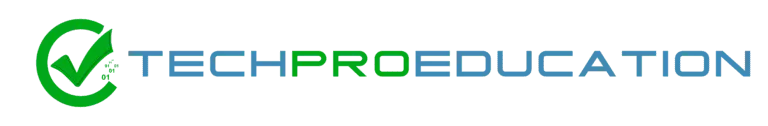